In [2]:
import numpy as np
import pandas as pd

In [3]:
import os

In [4]:
%config Completer.use_jedi = False   # Bu nedir ?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  """Entry point for launching an IPython kernel.


In [5]:
!nvidia-smi

Sat Aug 28 08:06:48 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    36W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Yeni Bölüm

In [6]:
!pip3 install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchaudio===0.9.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 1.6 MB/s eta 0:12:31tcmalloc: large alloc 1147494400 bytes == 0x55ade8940000 @  0x7fd2c3adf615 0x55adaee3902c 0x55adaef1917a 0x55adaee3be4d 0x55adaef2dc0d 0x55adaeeb00d8 0x55adaeeaac35 0x55adaee3d73a 0x55adaeeaff40 0x55adaeeaac35 0x55adaee3d73a 0x55adaeeac93b 0x55adaef2ea56 0x55adaeeabfb3 0x55adaef2ea56 0x55adaeeabfb3 0x55adaef2ea56 0x55adaeeabfb3 0x55adaee3db99 0x55adaee80e79 0x55adaee3c7b2 0x55adaeeafe65 0x55adaeeaac35 0x55adaee3d73a 0x55adaeeac93b 0x55adaeeaac35 0x55adaee3d73a 0x55adaeeabb0e 0x55adaee3d65a 0x55adaeeabd67 0x55adaeeaac35
     |████████████████▌               | 1055.7 MB 1.7 MB/s eta 0:09:35tcmalloc: large alloc 1434370048 bytes == 0x55ae2cf96000 @  0x7fd2c3adf615 0x55adaee3902c 0x55adaef1917a 0x55adaee3be4d 0x55adaef2dc0d 0x55adaeeb00d8 0x55adaeeaac35 0x55adaee3d73a 0x55adaeeaff40 0x55adaeeaac35 0x55adaee3d73a 0x55adaeeac93b 0x55adaef2ea56 0x55adaeeabf

In [12]:
!pip install "fastai==2.2.7"

     |████████████████████████████████| 193 kB 10.8 MB/s 
     |████████████████████████████████| 12.8 MB 44.6 MB/s 
     |████████████████████████████████| 776.8 MB 11 kB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu111
    Uninstalling torch-1.9.0+cu111:
      Successfully uninstalled torch-1.9.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu111
    Uninstalling torchvision-0.10.0+cu111:
      Successfully uninstalled torchvision-0.10.0+cu111
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.7.1 which is incomp

In [2]:
import torch
torch.__version__

'1.7.1'

In [1]:
import fastai
fastai.__version__

'2.2.7'

In [3]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import *

In [4]:
user = "ruslanahmadov" 
key = "faf7fdfcecbe76c653003ce3988f59a3"
if '.kaggle' not in os.listdir('/root'):
    !mkdir ~/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 666 /root/.kaggle/kaggle.json
with open('/root/.kaggle/kaggle.json', 'w') as f:
    f.write('{"username":"%s","key":"%s"}' % (user, key))
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.69G/2.70G [00:52<00:00, 105MB/s] 
100% 2.70G/2.70G [00:52<00:00, 55.4MB/s]


In [5]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [7]:
data_path = "/content/New Plant Diseases Dataset(Augmented)"

In [8]:
tfms_for_item=RandomResizedCrop(128,min_scale=0.35)
tfms_for_batch=[Normalize.from_stats(*imagenet_stats)]
data=ImageDataLoaders.from_folder(data_path,item_tfms=tfms_for_item,batch_tfms=tfms_for_batch,valid_pct=0.15,shuffle=True)

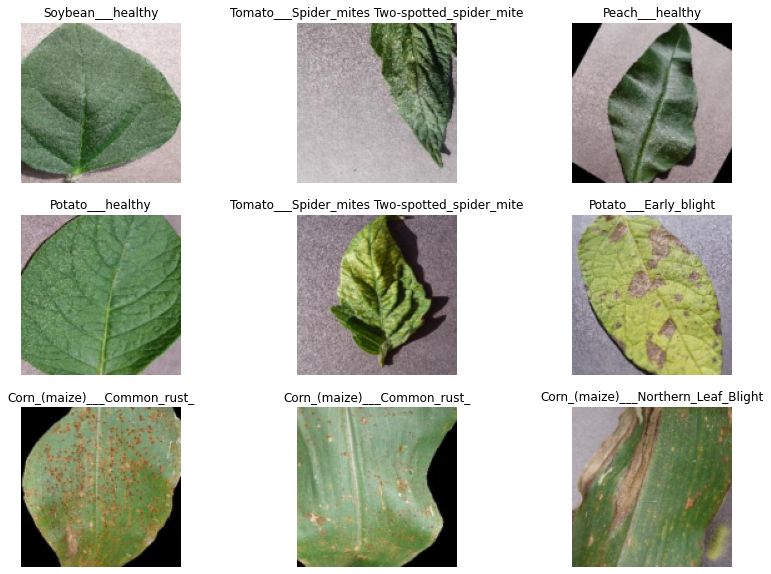

In [10]:
data.show_batch(figsize=(14,10))

In [11]:
print(data.c)

38


In [12]:
from pathlib import Path

In [13]:
model=cnn_learner(data,resnet34,metrics=accuracy,model_dir=("/kaggle/working/"),path=Path("."))

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.015848932787775993)

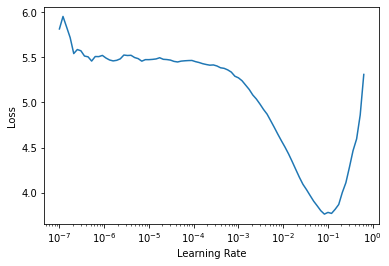

In [14]:
model.lr_find()

In [15]:
model.fit_one_cycle(5,12e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.495974,0.314321,0.909560,06:09
1,0.259787,0.131429,0.959105,05:39
2,0.134451,0.065739,0.979287,05:36
3,0.075687,0.024889,0.992716,05:37
4,0.059013,0.019755,0.994689,05:43


In [16]:
model.save("my_model.pk1")

Path('/kaggle/working/my_model.pk1.pth')

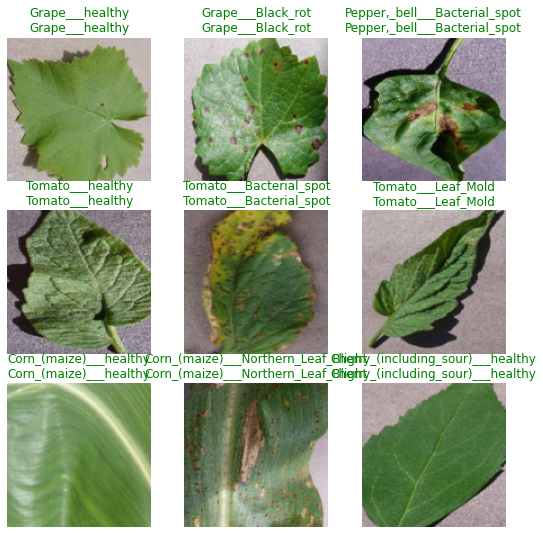

In [17]:
model.show_results()

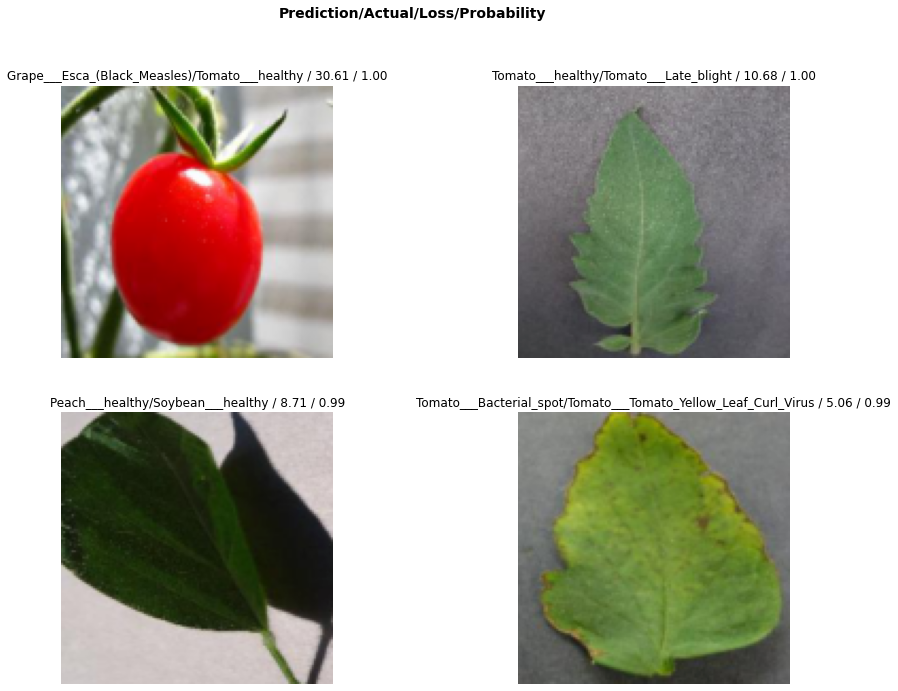

In [19]:
interpretation = ClassificationInterpretation.from_learner(model)
losses,indices=interpretation.top_losses()
interpretation.plot_top_losses(4,figsize=(15,11))

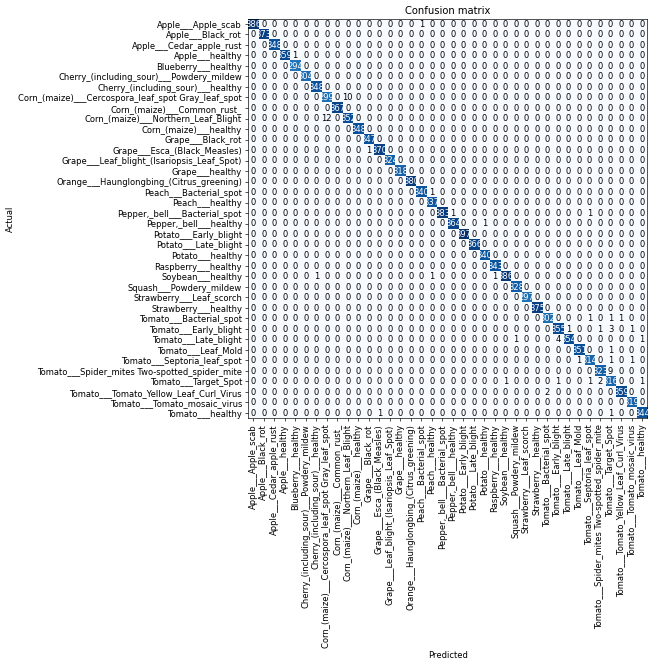

In [20]:
interpretation.plot_confusion_matrix(figsize=(15,11),dpi=60)

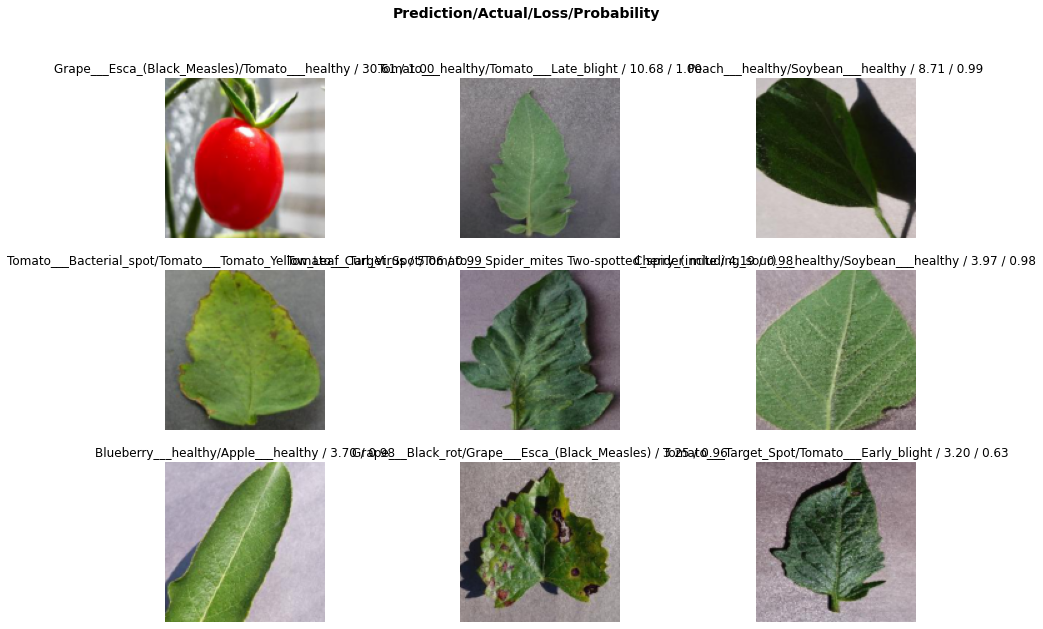

In [21]:
interpretation.plot_top_losses(9,figsize=(15,10))

In [22]:
interpretation.most_confused(min_val=2)

[('Corn_(maize)___Northern_Leaf_Blight',
  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  12),
 ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Northern_Leaf_Blight',
  10),
 ('Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 9),
 ('Tomato___Late_blight', 'Tomato___Early_blight', 4),
 ('Tomato___Early_blight', 'Tomato___Target_Spot', 3),
 ('Tomato___Target_Spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 2),
 ('Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 2)]